## Import Libraries

In [ ]:
from IPython.display import clear_output

In [ ]:
# @title Download Kaggle Dataset
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d maedemaftouni/large-covid19-ct-slice-dataset
! unzip large-covid19-ct-slice-dataset.zip

clear_output()
print('Done!')

Done!


In [ ]:
# @title Download Test Dataset
! gdown https://drive.google.com/u/0/uc?id=12e_9ykIRtwd5p8cJrPuHJeBoFdLSIyss&export=download
! unzip clinical_dataset.zip

clear_output()
print('Done!')

Done!


In [ ]:
#@title Get Dataset

# !git clone https://github.com/UCSD-AI4H/COVID-CT
# !unzip /content/COVID-CT/Images-processed/CT_COVID.zip -d /content
# !unzip /content/COVID-CT/Images-processed/CT_NonCOVID.zip -d /content

clear_output()
print('Done!')

Done!


In [ ]:
import numpy as np # linear algebra
import random
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import cv2
import shutil
from glob import glob
# Helper libraries
import matplotlib.pyplot as plt
import math

import os
os.environ['KERAS_BACKEND'] = 'theano'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import keras as ks

clear_output()
print('Done!')

Done!


In [ ]:
# @title Count files by extension in folders
! ls /content/clinical_dataset/covid/2 -q -U | awk -F . '{print $NF}' | sort | uniq -c | awk '{print $2,$1}'
# ! ls /content/curated_data/curated_data/2COVID -q -U | awk -F . '{print $NF}' | sort | uniq -c | awk '{print $2,$1}'

dcm 307


## Test Dataset

In [ ]:
# @title Find Corrupted .dcm File

import pydicom
import os

dcm_path = glob(os.path.join('/content/clinical_dataset/', '*/*', '*.dcm'))

for p in dcm_path:
  try:
    pydicom.dcmread(p).pixel_array.shape
  except Exception as e:
    print(p)
    os.remove(p)

/content/clinical_dataset/covid/5/1.3.12.2.1107.5.1.4.78983.30000020082519424362500020394.dcm
/content/clinical_dataset/covid/3/1.3.12.2.1107.5.1.4.78983.30000020082216044140600015227.dcm
/content/clinical_dataset/chest_normal/4/1.3.12.2.1107.5.1.4.78983.30000020082216044140600005890.dcm
/content/clinical_dataset/chest_normal/2/1.3.12.2.1107.5.1.4.78983.30000020102708381514000018901.dcm
/content/clinical_dataset/chest_normal/6/1.3.12.2.1107.5.1.4.78983.30000020102708381514000015272.dcm
/content/clinical_dataset/chest_normal/8/1.3.12.2.1107.5.1.4.78983.30000020082519424362500009120.dcm


In [ ]:
pydicom.dcmread('/content/clinical_dataset/covid/2/1.3.12.2.1107.5.1.4.78983.30000020082216044140600013944.dcm')

In [ ]:
! pip install med2image

clear_output()

In [ ]:
%cd /content
! printf "%s\n" */* | sort -k1,1 -t/ -u


/content
clinical_dataset/chest_normal
COVID-CT/baseline methods
curated_data/curated_data
sample_data/anscombe.json


In [ ]:
! find . -name "*.pdf" -type f -delete

In [ ]:
! rm -rf clinic_test
 
! mkdir -p /content/clinic_test/CT_NonCOVID/1/CT_COVID /content/clinic_test/CT_NonCOVID/1/CT_NonCOVID
! med2image -i /content/clinical_dataset/chest_normal/1/1.3.12.2.1107.5.1.4.78983.30000020101907235865600063648.dcm -d /content/clinic_test/CT_NonCOVID/1/CT_NonCOVID
! mkdir -p /content/clinic_test/CT_NonCOVID/10/CT_COVID /content/clinic_test/CT_NonCOVID/10/CT_NonCOVID
! med2image -i /content/clinical_dataset/chest_normal/10/1.3.12.2.1107.5.1.4.78983.30000020102708381514000032296.dcm -d clinic_test/CT_NonCOVID/10/CT_NonCOVID
! mkdir -p /content/clinic_test/CT_NonCOVID/2/CT_COVID /content/clinic_test/CT_NonCOVID/2/CT_NonCOVID
! med2image -i /content/clinical_dataset/chest_normal/2/1.3.12.2.1107.5.1.4.78983.30000020102708381514000018706.dcm -d clinic_test/CT_NonCOVID/2/CT_NonCOVID
! mkdir -p /content/clinic_test/CT_NonCOVID/3/CT_COVID /content/clinic_test/CT_NonCOVID/3/CT_NonCOVID
! med2image -i /content/clinical_dataset/chest_normal/3/1.3.12.2.1107.5.1.4.78983.30000020102708381514000026966.dcm -d clinic_test/CT_NonCOVID/3/CT_NonCOVID
! mkdir -p /content/clinic_test/CT_NonCOVID/4/CT_COVID /content/clinic_test/CT_NonCOVID/4/CT_NonCOVID
! med2image -i /content/clinical_dataset/chest_normal/4/1.3.12.2.1107.5.1.4.78983.30000020082216044140600005787.dcm -d clinic_test/CT_NonCOVID/4/CT_NonCOVID
! mkdir -p /content/clinic_test/CT_NonCOVID/5/CT_COVID /content/clinic_test/CT_NonCOVID/5/CT_NonCOVID
! med2image -i /content/clinical_dataset/chest_normal/5/1.3.12.2.1107.5.1.4.78983.30000020102708381514000032359.dcm -d clinic_test/CT_NonCOVID/5/CT_NonCOVID
! mkdir -p /content/clinic_test/CT_NonCOVID/6/CT_COVID /content/clinic_test/CT_NonCOVID/6/CT_NonCOVID
! med2image -i /content/clinical_dataset/chest_normal/6/1.3.12.2.1107.5.1.4.78983.30000020102708381514000015176.dcm -d clinic_test/CT_NonCOVID/6/CT_NonCOVID
! mkdir -p /content/clinic_test/CT_NonCOVID/7/CT_COVID /content/clinic_test/CT_NonCOVID/7/CT_NonCOVID
! med2image -i /content/clinical_dataset/chest_normal/7/1.3.12.2.1107.5.1.4.78983.30000020101907235865600080823.dcm -d clinic_test/CT_NonCOVID/7/CT_NonCOVID
! mkdir -p /content/clinic_test/CT_NonCOVID/8/CT_COVID /content/clinic_test/CT_NonCOVID/8/CT_NonCOVID
! med2image -i /content/clinical_dataset/chest_normal/8/1.3.12.2.1107.5.1.4.78983.30000020082519424362500009053.dcm -d clinic_test/CT_NonCOVID/8/CT_NonCOVID
! mkdir -p /content/clinic_test/CT_NonCOVID/9/CT_COVID /content/clinic_test/CT_NonCOVID/9/CT_NonCOVID
! med2image -i /content/clinical_dataset/chest_normal/9/1.3.12.2.1107.5.1.4.78983.30000020082519424362500022781.dcm -d clinic_test/CT_NonCOVID/9/CT_NonCOVID
 
! mkdir -p /content/clinic_test/CT_COVID/1/CT_COVID /content/clinic_test/CT_COVID/1/CT_NonCOVID
! med2image -i /content/clinical_dataset/covid/1/1.3.12.2.1107.5.1.4.78983.30000020101907235865600060396.dcm -d clinic_test/CT_COVID/1/CT_COVID
! mkdir -p /content/clinic_test/CT_COVID/10/CT_COVID /content/clinic_test/CT_COVID/10/CT_NonCOVID
! med2image -i /content/clinical_dataset/covid/10/1.3.12.2.1107.5.1.4.78983.30000020102708381514000023014.dcm -d clinic_test/CT_COVID/10/CT_COVID
! mkdir -p /content/clinic_test/CT_COVID/2/CT_COVID /content/clinic_test/CT_COVID/2/CT_NonCOVID
! med2image -i /content/clinical_dataset/covid/2/1.3.12.2.1107.5.1.4.78983.30000020082216044140600013865.dcm -d clinic_test/CT_COVID/2/CT_COVID
! mkdir -p /content/clinic_test/CT_COVID/3/CT_COVID /content/clinic_test/CT_COVID/3/CT_NonCOVID
! med2image -i /content/clinical_dataset/covid/3/1.3.12.2.1107.5.1.4.78983.30000020082216054245300042381.dcm -d clinic_test/CT_COVID/3/CT_COVID
! mkdir -p /content/clinic_test/CT_COVID/4/CT_COVID /content/clinic_test/CT_COVID/4/CT_NonCOVID
! med2image -i /content/clinical_dataset/covid/4/1.3.12.2.1107.5.1.4.78983.30000020082519424362500022301.dcm -d clinic_test/CT_COVID/4/CT_COVID
! mkdir -p /content/clinic_test/CT_COVID/5/CT_COVID /content/clinic_test/CT_COVID/5/CT_NonCOVID
! med2image -i /content/clinical_dataset/covid/5/1.3.12.2.1107.5.1.4.78983.30000020082519424362500020327.dcm -d clinic_test/CT_COVID/5/CT_COVID
! mkdir -p /content/clinic_test/CT_COVID/6/CT_COVID /content/clinic_test/CT_COVID/6/CT_NonCOVID
! med2image -i /content/clinical_dataset/covid/6/1.3.12.2.1107.5.1.4.78983.30000020101907235865600064123.dcm -d clinic_test/CT_COVID/6/CT_COVID
! mkdir -p /content/clinic_test/CT_COVID/7/CT_COVID /content/clinic_test/CT_COVID/7/CT_NonCOVID
! med2image -i /content/clinical_dataset/covid/7/1.3.12.2.1107.5.1.4.78983.30000020101907235865600059792.dcm -d clinic_test/CT_COVID/7/CT_COVID
! mkdir -p /content/clinic_test/CT_COVID/8/CT_COVID /content/clinic_test/CT_COVID/8/CT_NonCOVID
! med2image -i /content/clinical_dataset/covid/8/1.3.12.2.1107.5.1.4.78983.30000020102708381514000024483.dcm -d clinic_test/CT_COVID/8/CT_COVID
! mkdir -p /content/clinic_test/CT_COVID/9/CT_COVID /content/clinic_test/CT_COVID/9/CT_NonCOVID
! med2image -i /content/clinical_dataset/covid/9/1.3.12.2.1107.5.1.4.78983.30000020101907235865600060302.dcm -d clinic_test/CT_COVID/9/CT_COVID
 
 
clear_output()
print('Done!')

Done!


In [ ]:
! ls /content/clinic_test/CT_COVID -q -U | awk -F . '{print $NF}' | sort | uniq -c | awk '{print $2,$1}'
! ls /content/clinic_test/CT_NonCOVID -q -U | awk -F . '{print $NF}' | sort | uniq -c | awk '{print $2,$1}'

ls: cannot access '/content/clinic_test/CT_COVID': No such file or directory
1 1


In [ ]:
total_clinic_test_covid = len(os.listdir('clinic_test/CT_COVID'))
total_clinic_test_noncovid = len(os.listdir('clinic_test/CT_NonCOVID'))

In [ ]:
test_pos_path = '/content/clinic_test/CT_COVID'
test_neg_path = '/content/clinic_test/CT_NonCOVID'

test_pos_images_lst = glob(os.path.join(test_pos_path, "*.jpg"))
test_neg_images_lst = glob(os.path.join(test_neg_path, "*.jpg"))

image_positive = cv2.imread(os.path.join(test_pos_images_lst[0]))
image_negative = cv2.imread(os.path.join(test_neg_images_lst[0]))

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(image_negative)
fig.add_subplot(1,2, 2)
plt.imshow(image_positive)
plt.show()

print("Image POS Shape {}".format(image_positive.shape))
print("Image NEG Shape {}".format(image_negative.shape))

IndexError: ignored

## Model

Total Positive Cases Covid19 images: 6893
Total Negative Cases Covid19 images: 7593


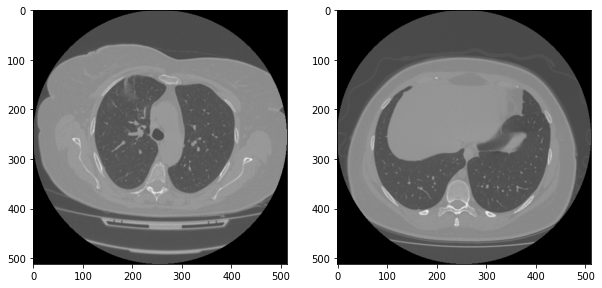

Image POS Shape (512, 512, 3)
Image NEG Shape (512, 512, 3)


In [ ]:
path_positive_cases = os.path.join('/content/curated_data/curated_data/1NonCOVID/')
path_negative_cases = os.path.join('/content/curated_data/curated_data/2COVID/')

positive_images_ls = glob(os.path.join(path_positive_cases,"*.png"))

negative_images_ls = glob(os.path.join(path_negative_cases,"*.png"))

covid = {'class': 'CT_COVID',
         'path': path_positive_cases,
         'images': positive_images_ls}

non_covid = {'class': 'CT_NonCOVID',
             'path': path_negative_cases,
             'images': negative_images_ls}

total_positive_covid = len(positive_images_ls)
total_negative_covid = len(negative_images_ls)
print("Total Positive Cases Covid19 images: {}".format(total_positive_covid))
print("Total Negative Cases Covid19 images: {}".format(total_negative_covid))

image_positive = cv2.imread(os.path.join(positive_images_ls[0]))
image_negative = cv2.imread(os.path.join(negative_images_ls[0]))

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(image_negative)
fig.add_subplot(1,2, 2)
plt.imshow(image_positive)
plt.show()

print("Image POS Shape {}".format(image_positive.shape))
print("Image NEG Shape {}".format(image_negative.shape))

In [ ]:
# Create Train-Test Directory
subdirs  = ['train/', 'test/']
for subdir in subdirs:
    labeldirs = ['CT_COVID', 'CT_NonCOVID']
    for labldir in labeldirs:
        newdir = subdir + labldir
        os.makedirs(newdir, exist_ok=True)

# Copy Images to test set

random.seed(12)
test_ratio = 0.1
########## yahan change

for cases in [covid, non_covid]:
    total_cases = len(cases['images'])  # number of total images
    num_to_select = int(test_ratio * total_cases)  # number of images to copy to test set

    print(cases['class'], num_to_select)

    list_of_random_files = random.sample(cases['images'], num_to_select)  # random files selected

    for files in list_of_random_files:
        shutil.copy2(files, 'test/' + cases['class'])

# Copy Images to train set
for cases in [covid, non_covid]:
    image_test_files = os.listdir('test/' + cases['class']) # list test files
    for images in cases['images']:
        if images.split('/')[-1] not in (image_test_files): #exclude test files from shutil.copy
            shutil.copy2(images, 'train/' + cases['class'])


total_train_covid = len(os.listdir('train/CT_COVID'))
total_train_noncovid = len(os.listdir('train/CT_NonCOVID'))
total_test_covid = len(os.listdir('test/CT_COVID'))
total_test_noncovid = len(os.listdir('test/CT_NonCOVID'))

print("Train sets images COVID: {}".format(total_train_covid))
print("Train sets images Non COVID: {}".format(total_train_noncovid))
print("Test sets images COVID: {}".format(total_test_covid))
print("Test sets images Non COVID: {}".format(total_test_noncovid))



CT_COVID 689
CT_NonCOVID 759
Train sets images COVID: 6204
Train sets images Non COVID: 6834
Test sets images COVID: 689
Test sets images Non COVID: 759


In [ ]:
batch_size = 32
epochs = 50
IMG_HEIGHT = 224
IMG_WIDTH = 224

train_image_generator = ImageDataGenerator(rescale=1./255,
                                           horizontal_flip = True) # Generator for our training data
test_image_generator = ImageDataGenerator(rescale=1./255,
                                          horizontal_flip = True) # Generator for our validation

clinic_image_generator = ImageDataGenerator(rescale=1./255,
                                            horizontal_flip = True)

# re-size all the images to this
IMAGE_SIZE = [224, 224]

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

folders = glob('content/drive/MyDrive/CovidData/*/')
folders
vgg.summary()

x = Flatten()(vgg.output)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

Found 13038 images belonging to 2 classes.
Found 1448 images belonging to 2 classes.
Epoch 1/10
408/408 [==============================] - 125s 212ms/step - loss: 2.3488 - accuracy: 0.8171 - val_loss: 0.2612 - val_accuracy: 0.8985
Epoch 2/10
408/408 [==============================] - 74s 180ms/step - loss: 0.2320 - accuracy: 0.9074 - val_loss: 0.1954 - val_accuracy: 0.9282
Epoch 3/10
408/408 [==============================] - 73s 178ms/step - loss: 0.1819 - accuracy: 0.9312 - val_loss: 0.2820 - val_accuracy: 0.8902
Epoch 4/10
408/408 [==============================] - 73s 179ms/step - loss: 0.1627 - accuracy: 0.9367 - val_loss: 0.1654 - val_accuracy: 0.9378
Epoch 5/10
408/408 [==============================] - 72s 177ms/step - loss: 0.1375 - accuracy: 0.9450 - val_loss: 0.2094 - val_accuracy: 0.9206
Epoch 6/10
408/408 [==============================] - 72s 177ms/step - loss: 0.1270 - accuracy: 0.9477 - val_loss: 0.1853 - val_accuracy: 0.9289
Epoch 7/10
408/408 [========================

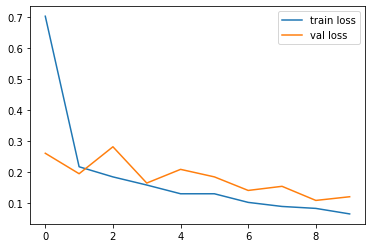

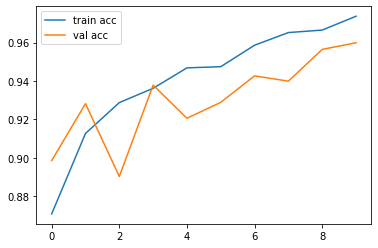

<Figure size 432x288 with 0 Axes>

In [ ]:

# tell the model what cost and optimization method to use

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

train_dir = os.path.join('train')
test_dir = os.path.join('test')

clinic_dir = os.path.join('clinic_test')


total_train = total_train_covid + total_train_noncovid
total_test = total_test_covid + total_test_noncovid

# clinic_test = total_clinic_test_covid + total_clinic_test_noncovid

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')


# clinic_data_gen = clinic_image_generator.flow_from_directory(batch_size=batch_size,
#                                                               directory=clinic_dir,
#                                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
#                                                               class_mode='categorical')

# fit the model
r = model.fit(
  train_data_gen,
  validation_data=test_data_gen,
  epochs=10,
  steps_per_epoch=len(train_data_gen),
  validation_steps=len(test_data_gen),
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
for i in range(10):
  print('Evaluating on persion %d' % (i+1))
  clinic_data_gen_noncovid = clinic_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory='/content/clinic_test/CT_NonCOVID/%d'%(i+1),
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')
  model.evaluate(clinic_data_gen_noncovid, batch_size=batch_size)

Evaluating on persion 1
Found 316 images belonging to 2 classes.
10/10 [==============================] - 2s 181ms/step - loss: 0.6149 - accuracy: 0.8481
Evaluating on persion 2
Found 797 images belonging to 2 classes.
25/25 [==============================] - 4s 166ms/step - loss: 2.6643 - accuracy: 0.6361
Evaluating on persion 3
Found 243 images belonging to 2 classes.
8/8 [==============================] - 1s 170ms/step - loss: 2.9256 - accuracy: 0.5844
Evaluating on persion 4
Found 296 images belonging to 2 classes.
10/10 [==============================] - 2s 164ms/step - loss: 2.0409 - accuracy: 0.6655
Evaluating on persion 5
Found 306 images belonging to 2 classes.
10/10 [==============================] - 2s 175ms/step - loss: 0.7900 - accuracy: 0.8725
Evaluating on persion 6
Found 298 images belonging to 2 classes.
10/10 [==============================] - 2s 162ms/step - loss: 2.0681 - accuracy: 0.6409
Evaluating on persion 7
Found 306 images belonging to 2 classes.
10/10 [======

In [ ]:
for i in range(10):
  print('Evaluating on persion %d' % (i+1))
  clinic_data_gen_covid = clinic_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory='/content/clinic_test/CT_COVID/%d'%(i+1),
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')
  model.evaluate(clinic_data_gen_covid, batch_size=batch_size)

Evaluating on persion 1
Found 348 images belonging to 2 classes.
11/11 [==============================] - 2s 187ms/step - loss: 16.9640 - accuracy: 0.1236
Evaluating on persion 2
Found 306 images belonging to 2 classes.
10/10 [==============================] - 2s 173ms/step - loss: 27.9776 - accuracy: 0.0065
Evaluating on persion 3
Found 306 images belonging to 2 classes.
10/10 [==============================] - 2s 171ms/step - loss: 17.7274 - accuracy: 0.0163
Evaluating on persion 4
Found 306 images belonging to 2 classes.
10/10 [==============================] - 2s 171ms/step - loss: 12.2071 - accuracy: 0.1928
Evaluating on persion 5
Found 334 images belonging to 2 classes.
11/11 [==============================] - 2s 167ms/step - loss: 13.5259 - accuracy: 0.1677
Evaluating on persion 6
Found 305 images belonging to 2 classes.
10/10 [==============================] - 2s 170ms/step - loss: 16.8298 - accuracy: 0.1344
Evaluating on persion 7
Found 332 images belonging to 2 classes.
11/11